In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pyarrow.parquet as pq
import s3fs
import matplotlib.pyplot as plt
import pandas as pd

from decimal import Decimal

In [3]:
BUCKET='nbc-events-partitioned'
KEY='viewer_partitions/partition=p0000' 
COLUMNS = ['file', 'mpid','platform', 'nbc_profile', 'mvpd', 'video_end_type','resume','video_duration_watched',
           'video_duration', 'resume_time','genre','show', 'episode_title','season','video_type', 'ip','event_start_unixtime_ms' ]

In [4]:
%%time
s3 = s3fs.S3FileSystem( default_fill_cache=False)
dataset = pq.ParquetDataset(f"{BUCKET}/{KEY}", filesystem=s3, validate_schema=False)
df = dataset.read(columns=COLUMNS).to_pandas()
DATA = df

CPU times: user 3.33 s, sys: 848 ms, total: 4.17 s
Wall time: 18.7 s


In [5]:
%time
df = DATA
print()
print("events:", len(df))
MPIDS = df.mpid.value_counts()
print("distinct users:", len(MPIDS))
print("avg events per user:", MPIDS.mean().round(1))
print("avg ips per user", round(df.ip.nunique()/len(MPIDS), 1))
print()
print(f"download rate (events/hour): {(len(df)/20)*(60*60):,.0f}")

x=round(len(df)/ (10/10**6))*60*60
print(f"processing rate (events/hour): {x:,.0f}")
print()
print(f"memory usage: {df.memory_usage().sum():,}")
x

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs

events: 1278996
distinct users: 128269
avg events per user: 10.0
avg ips per user 1.8

download rate (events/hour): 230,219,280
processing rate (events/hour): 460,438,560,000,000

memory usage: 173,943,584


460438560000000

In [42]:
print(((len(df) * (10**6) * (60**2))/100))
(len(df) * 1 * (60**2))/20

46043856000000.0


230219280.0

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


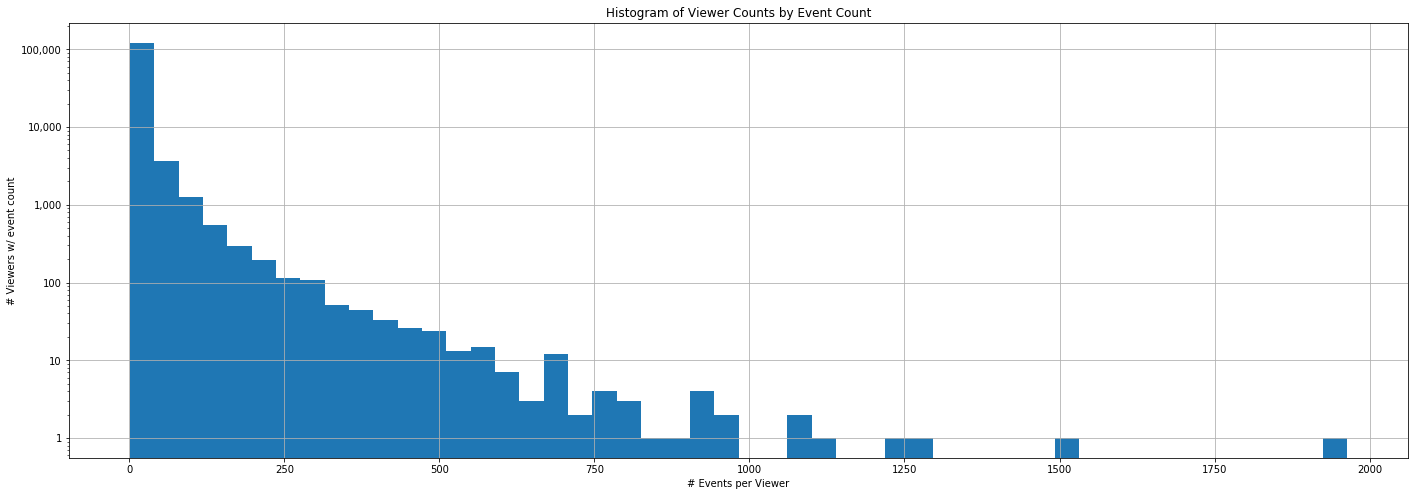

In [140]:
%time
fig = plt.figure(figsize=(24,8))
ax = MPIDS.hist(bins=50,   )
ax.set_yscale('log')
ax.set_title("Histogram of Viewer Counts by Event Count")
ax.set_xlabel("# Events per Viewer")
ax.set_ylabel("# Viewers w/ event count");
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks()]);

In [21]:
%time

mpid = 6470602331570062740 # small, 
mpid = mpid = 6053785677818666040  #, likes sharks
#mpid = -2732128289763626040  # tonight show highlights, 
#mpid =  3166073724721267440 # the voice,
#mpid = -2270693790639375300 # days of our lives, 
#mpid = 5890019222452638720 # enjoys nbc service, 
#mpid = 1032781045710253380 # single record
df = DATA.set_index('mpid')
with pd.option_context('max_rows', None, 'max_columns', None):
    display(df.loc[mpid].sort_values('event_start_unixtime_ms', ascending=False).drop(columns='event_start_unixtime_ms'))

CPU times: user 4 µs, sys: 10 µs, total: 14 µs
Wall time: 31 µs


,file,platform,nbc_profile,mvpd,video_end_type,resume,video_duration_watched,video_duration,resume_time,genre,show,episode_title,season,video_type,ip
mpid,,,,,,,,,,,,,,,
6053785677818666040,NBC_App_20190827071903462735_11442.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,99,86.15,None,Drama,Lake Placid: Legacy,Not Set,None,Movie,162.198.234.72
6053785677818666040,NBC_App_20190823144646187590_25282.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,99,86.3,None,Drama,Zombie Tidal Wave,Not Set,None,Movie,162.198.234.72
6053785677818666040,NBC_App_20190818054924662535_35422.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,20,84.4666666666667,None,Drama,Nightmare Shark,Not Set,None,Movie,162.198.234.72
6053785677818666040,NBC_App_20190817151757186790_24130.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,99,86.3,None,Drama,Toxic Shark,Not Set,None,Movie,162.198.234.72
6053785677818666040,NBC_App_20190817133749525164_61459.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,4,80.25,None,Drama,Dam Sharks!,Not Set,None,Movie,162.198.234.72
6053785677818666040,NBC_App_20190815200007513023_05174.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,100,86.3,None,Drama,Ozark Sharks,Not Set,None,Movie,162.198.234.72
6053785677818666040,NBC_App_20190815181518163200_89409.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,100,86.2333333333333,None,Drama,Jersey Shore Shark Attack,Not Set,None,Movie,162.198.234.72
6053785677818666040,NBC_App_20190813055846486117_59267.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,87,80.25,None,Drama,Dam Sharks!,Not Set,None,Movie,162.198.234.72
6053785677818666040,NBC_App_20190813042850562892_45335.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,2,86.3,None,Drama,Planet of the Sharks,Not Set,None,Movie,162.198.234.72


In [ ]:
%time
cols = ['mpid','show']
df = DATA[cols].drop_duplicates().copy()
df['watched'] =1
df = df.set_index(cols).unstack()
ASSOC_MATRIX = df
ASSOC_MATRIX

In [ ]:
ASSOC_MAT